Epoch 1/100


C:\Users\jaya karthick\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1370 - val_loss: 0.0011
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0035 - val_loss: 5.5165e-04
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 4.2831e-04
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 3.5245e-04
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 3.2481e-04
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 2.9362e-04
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010 - val_loss: 5.0665e-04
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0010 - val_loss: 2.5061e-04
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2829e-04 - val_loss: 2.4118e-04
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.7405e-04 - val_loss: 2.9031e-04
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4843e-04 - val_loss: 3.2783e-04
Epoch 12/100

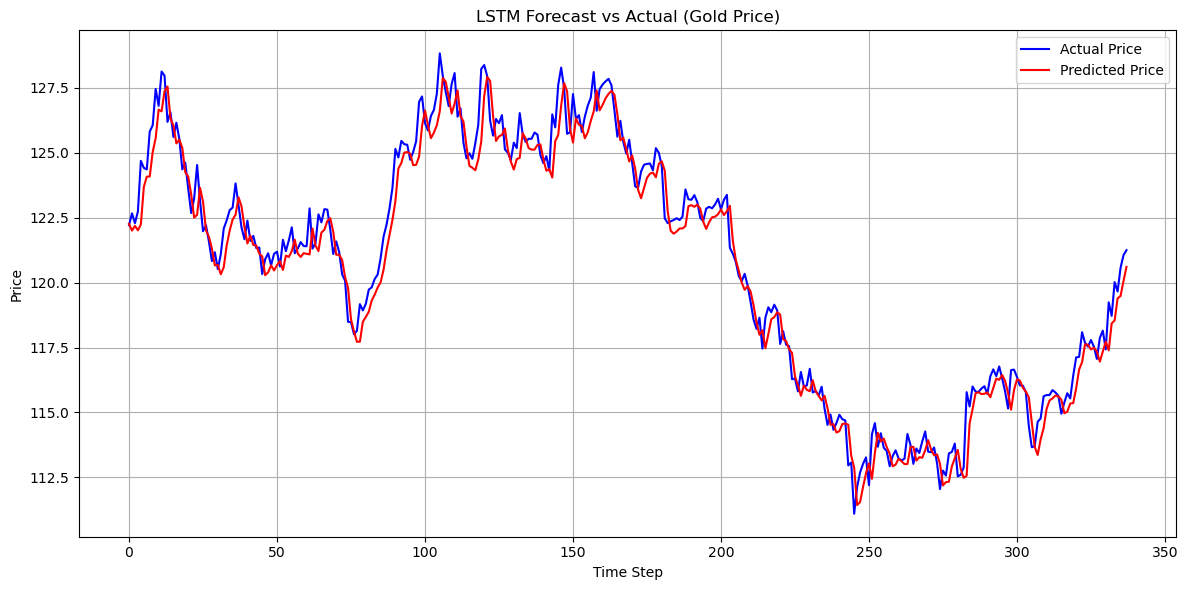

In [1]:
# === 1. Import Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# === 2. Load Data ===
file_path = r"D:/221501507/TIME SERIES ANALYSIS AND FORECASTING/EX06/archive (1) (1)/FINAL_USO.csv"
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")
df.columns = df.columns.str.strip()

# === 3. Use 'Adj Close' Column ===
target = "Adj Close"
if target not in df.columns:
    raise ValueError(f"'{target}' column not found in dataset.")

ts = df[[target]].dropna()

# === 4. Normalize the Data ===
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts)

# === 5. Create Sequences for LSTM ===
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 30  # number of past days to use
X, y = create_sequences(ts_scaled, sequence_length)

# === 6. Train-Test Split ===
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === 7. Define LSTM Model ===
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# === 8. Train the Model ===
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === 9. Forecasting ===
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# === 10. Plot Forecast vs Actual ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Price', color='blue')
plt.plot(y_pred_inv, label='Predicted Price', color='red')
plt.title("LSTM Forecast vs Actual (Gold Price)")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
